<a href="https://colab.research.google.com/github/jesthi-sanjeeta/AGstage2/blob/master/Project51_AT_CapstoneProject13_LifeExpectancy_SolutionCopy_v0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 13: Life Expectancy Analysis


### Context

The term **Life Expectancy** refers to the number of years a person can expect to live. It is based on an estimate of the average age of a population when they die. Life expectancy is one of the key metrics used for assessing the overall health of a population. 

 The Global Health Observatory (GHO) data repository under the World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. It has been observed that in the past 15 years, there is a huge development in the health sector resulting in the improvement of human mortality rates. The increases are nearly universal, from the richest to the poorest countries. Let's dive deeper into the life expectancy dataset and find out how different factors influence your life expectancy.




---

### Problem Statement

As the head of a leading life insurance company, your job is to formulate  global health insurance coverage plans and devise different life insurance solutions for different countries. For this, you need to obtain insightful trends and patterns in people's dying age across different countries. Also, you need to determine the factors that affect the average life expectancy of the people around the world to determine the premium rates for insurance policies.

---

### Data Description

This dataset contains life expectancy data and health factors for 193 countries from the year 2000-2015 which was collected from the WHO data repository website and its corresponding economic data was collected from the United Nation website. It consists of 22 columns and 2938 rows.

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing|
|Life expectancy|Life Expectancy in years|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption|
|percentage expenditure|Expenditure on health as a percent of GDP per capita (%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of the entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9 (%)|
|Income composition of resources|Productive use of resources|
|Schooling|Number of years of Schooling(years)|

Here's the dataset link:

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/life-expectancy/life-expectancy.csv

---

### Things To Do

- Rename the columns since most of them contain leading and trailing spaces. Some columns contain a few missing values. Treat them accordingly. 

- Find the answer to the following questions:

  1. Is there a rise in the average life expectancy around the world in a period of 15 years, i.e., from 2000 - 2015?

  2. Do developing countries have a lower life expectancy as compared to the developed countries?
  
  3. Calculate how many countries had extremely low life expectancy, i.e., less than 60 years. List those countries.

  4. What are the most critical factors affecting life expectancy?


---

#### 1. Import Modules & Load Dataset

Import the `numpy`, `pandas`, `matplotlib.pyplot` and `seaborn` modules and create a DataFrame using the `read_csv()` function of the `pandas` module.

In [ ]:
# Import the required modules and load the dataset.
# Dataset Link: https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/life-expectancy/life-expectancy.csv 
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

file_path = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/life-expectancy/life-expectancy.csv'
df = pd.read_csv(file_path)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Get the information on DataFrame using the 'info()' function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Q:** Which column(s) has/have non-numeric values?

**A:** `'Country'` and `'Status'`

---

#### 2. Renaming Columns

Rename some columns if they contain leading and trailing spaces.

In [ ]:
# Get a list of all the columns before renaming using 'df.columns'.
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

**Q:** Which columns contain trailing whitespaces (spaces before and after) in their names?

**A:** `'Life expectancy '`, `'Measles ', ' BMI ', 'under-five deaths ', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years'` and `' thinness 5-9 years'`

In [ ]:
# Remove whitespaces from both ends in the column name using the 'strip()' function.
for col in df.columns:
  df.rename(columns = {col : col.strip()}, inplace = True)

In [ ]:
# Get list of all the columns after renaming.
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

---

#### 3. Treat Null Values

Check for the null values in the DataFrame.


In [ ]:
# Check for the percentage null values in all the columns.
round(df.isnull().sum() * 100 / df.shape[0], 2)

Country                             0.00
Year                                0.00
Status                              0.00
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Alcohol                             6.60
percentage expenditure              0.00
Hepatitis B                        18.82
Measles                             0.00
BMI                                 1.16
under-five deaths                   0.00
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
HIV/AIDS                            0.00
GDP                                15.25
Population                         22.19
thinness  1-19 years                1.16
thinness 5-9 years                  1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

In [ ]:
# Store the columns containing more than 15% of the missing values in a list.
cols_to_drop = []
for col in df.columns:
  if df[col].isnull().sum() * 100 / df.shape[0] >= 15:
    cols_to_drop.append(col)

cols_to_drop

['Hepatitis B', 'GDP', 'Population']

In [ ]:
# Drop the columns containing more than 15% of the missing values using the 'drop()' function.
df = df.drop(columns = cols_to_drop)
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Replace the null values with the respective median of the columns.

**Hint:** To replace the null values with their respective median, you can use `fillna()` function. Some of the examples are:

- `df.fillna('0')` $\rightarrow$ Replaces all null values in the DataFrame `df` with `0`.

- `df.fillna('0', inplace = True)` $\rightarrow$ Here the `inplace = True` parameter instructs to replace the null values in-place i.e. directly inside the DataFrame without creating its copy. It is an optional parameter.

- `df['column_name'].fillna(df['column_name'].median(), inplace = True)` $\rightarrow$ Replaces all null values of a column with its median. 






In [ ]:
# Get the columns having the null values.
cols_having_null_values = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    cols_having_null_values.append(col)
cols_having_null_values

['Life expectancy',
 'Adult Mortality',
 'Alcohol',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

Before replacing the null values, let's split our DataFrame into two separate DataFrames based on the development status of the countries.

In [ ]:
# Grouping the DataFrame based on the development status of countries. First get the DataFrame of the developed countries
grouped_status = df.groupby('Status')
developed_df = grouped_status.get_group('Developed')
developed_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.00000,74,66.6,1,93.0,NaN,93.0,0.1,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.36305,340,66.1,1,92.0,9.42,92.0,0.1,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.85381,158,65.5,1,91.0,9.36,91.0,0.1,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,1,10.03,11714.99858,199,65.0,1,92.0,9.36,92.0,0.1,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,1,10.30,10986.26527,190,64.4,1,92.0,9.20,92.0,0.1,0.6,0.6,0.927,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.00000,37,63.1,33,92.0,15.14,96.0,0.1,0.7,0.6,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.00000,56,62.4,33,91.0,15.60,96.0,0.1,0.7,0.6,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.00000,41,61.7,33,9.0,14.55,94.0,0.1,0.8,0.6,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.00000,116,6.9,33,89.0,13.73,94.0,0.1,0.8,0.6,NaN,NaN


In [ ]:
# Check for the null values in the developed countries DataFrame
developed_df[cols_having_null_values].isnull().sum()

Life expectancy                     0
Adult Mortality                     0
Alcohol                            28
BMI                                 0
Polio                               0
Total expenditure                  32
Diphtheria                          0
thinness  1-19 years                0
thinness 5-9 years                  0
Income composition of resources    48
Schooling                          48
dtype: int64

In [ ]:
# Get the columns having the null values in the developed countries DataFrame
cols_developed_null_values = []
for col in developed_df.columns:
  if developed_df[col].isnull().sum() > 0:
    cols_developed_null_values.append(col)

cols_developed_null_values

['Alcohol',
 'Total expenditure',
 'Income composition of resources',
 'Schooling']

In [ ]:
# Get a descriptive statistics summary of the columns having the null values in the developed countries DataFrame
developed_df[cols_developed_null_values].describe()

,Alcohol,Total expenditure,Income composition of resources,Schooling
count,484.000000,480.000000,464.000000,464.000000
mean,9.826736,7.554042,0.852489,15.845474
std,2.765858,2.984389,0.052843,1.766799
min,0.010000,1.100000,0.703000,11.500000
25%,8.617500,6.407500,0.815000,14.700000
50%,10.320000,7.895000,0.862000,15.800000
75%,11.697500,9.212500,0.894000,16.800000
max,15.190000,17.600000,0.948000,20.700000


In [ ]:
# Replace the missing values of the developed countries DataFrame with the median value of the respective columns.
for col in cols_developed_null_values:
  developed_df[col].fillna((developed_df[col].median()), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
# Again get a descriptive statistics summary of the columns having null values in the developed countries DataFrame.
# This is done to verify that the replaced values did not disrupt the data 
developed_df[cols_developed_null_values].describe()

,Alcohol,Total expenditure,Income composition of resources,Schooling
count,512.000000,512.000000,512.000000,512.000000
mean,9.853711,7.575352,0.853381,15.841211
std,2.691356,2.890614,0.050377,1.681824
min,0.010000,1.100000,0.703000,11.500000
25%,8.740000,6.542500,0.819750,14.800000
50%,10.320000,7.895000,0.862000,15.800000
75%,11.582500,9.140000,0.891250,16.600000
max,15.190000,17.600000,0.948000,20.700000


**Note:** Make sure that there is no major change in the mean, std, min, 25%, 50%, 75% and max values after replacing null values. 

In [ ]:
# Again check whether there are any missing values
developed_df[cols_developed_null_values].isnull().sum()

Alcohol                            0
Total expenditure                  0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
# Get the DataFrame of the developing countries 
developing_df = grouped_status.get_group('Developing')
developing_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,1.6,1.7,0.427,9.8


In [ ]:
# Check for the null values in the developing countries DataFrame
developing_df[cols_having_null_values].isnull().sum()

Life expectancy                     10
Adult Mortality                     10
Alcohol                            166
BMI                                 34
Polio                               19
Total expenditure                  194
Diphtheria                          19
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    119
Schooling                          115
dtype: int64

In [ ]:
# Get a descriptive statistics summary of the columns having the null values in the developing countries DataFrame
developing_df[cols_having_null_values].describe()

,Life expectancy,Adult Mortality,Alcohol,BMI,Polio,Total expenditure,Diphtheria,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2416.000000,2416.000000,2260.000000,2392.000000,2407.000000,2232.000000,2407.000000,2392.000000,2392.000000,2307.000000,2311.000000
mean,67.111465,182.833195,3.484119,35.435326,80.170752,5.590694,79.951807,5.592935,5.635242,0.582310,11.219256
std,9.006092,127.974557,3.347537,19.425091,24.671531,2.233756,24.834300,4.514453,4.606130,0.201597,3.056601
min,36.300000,1.000000,0.010000,1.000000,3.000000,0.370000,2.000000,0.100000,0.100000,0.000000,0.000000
25%,61.100000,92.000000,0.517500,18.300000,74.000000,4.140000,75.000000,2.100000,2.100000,0.466500,9.600000
50%,69.000000,163.000000,2.560000,35.200000,91.000000,5.400000,91.000000,4.500000,4.600000,0.631000,11.700000
75%,74.000000,253.000000,5.750000,53.200000,97.000000,6.830000,96.500000,7.725000,7.800000,0.727000,13.200000
max,89.000000,723.000000,17.870000,87.300000,99.000000,17.240000,99.000000,27.700000,28.600000,0.919000,18.300000


In [ ]:
# Replace the missing values of the developing countries DataFrame with the median value of the respective columns.
for col in cols_having_null_values:
  developing_df[col].fillna((developing_df[col].median()), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
# Again get a descriptive statistics summary of the DataFrame to verify that the replaced values did not disrupt the data 
developing_df[cols_having_null_values].describe()

,Life expectancy,Adult Mortality,Alcohol,BMI,Polio,Total expenditure,Diphtheria,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000
mean,67.119250,182.751443,3.420886,35.432028,80.255565,5.575445,80.038335,5.577617,5.620734,0.584698,11.242045
std,8.988318,127.716744,3.239347,19.288454,24.593231,2.143168,24.755992,4.484535,4.575345,0.196869,2.984994
min,36.300000,1.000000,0.010000,1.000000,3.000000,0.370000,2.000000,0.100000,0.100000,0.000000,0.000000
25%,61.100000,92.250000,0.580000,18.400000,74.000000,4.252500,75.000000,2.100000,2.100000,0.475000,9.700000
50%,69.000000,163.000000,2.560000,35.200000,91.000000,5.400000,91.000000,4.500000,4.600000,0.631000,11.700000
75%,74.000000,252.750000,5.390000,53.075000,97.000000,6.700000,96.000000,7.700000,7.700000,0.722000,13.100000
max,89.000000,723.000000,17.870000,87.300000,99.000000,17.240000,99.000000,27.700000,28.600000,0.919000,18.300000


In [ ]:
# Again check whether there are any missing values
developing_df[cols_having_null_values].isnull().sum()

Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
BMI                                0
Polio                              0
Total expenditure                  0
Diphtheria                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

---

#### 4. Life Expectancy  w.r.t Year

Find out whether the average age of death had increased globally in a period of 15 years i.e. from the year 2000 to 2015. Create a bar plot to depict this relationship.

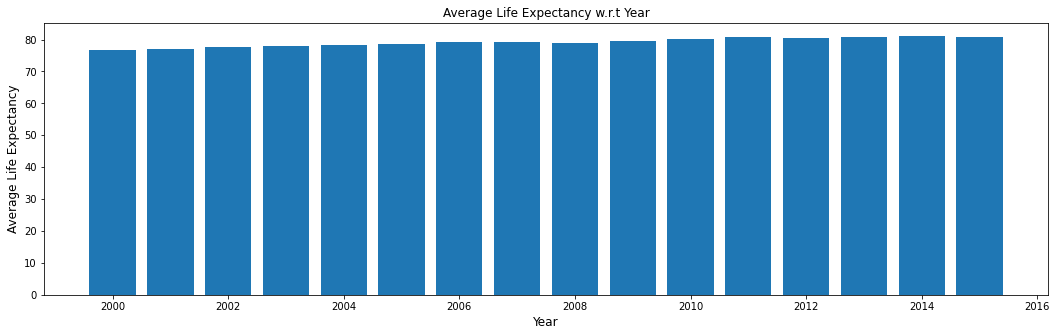

In [ ]:
# Life expectancy w.r.t Year using bar plot for developed countries
plt.figure(figsize = (18, 5))

plt.bar(developed_df.groupby('Year')['Year'].unique(), developed_df.groupby('Year')['Life expectancy'].mean())
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Average Life Expectancy", fontsize = 12)
plt.title("Average Life Expectancy w.r.t Year")
plt.show()

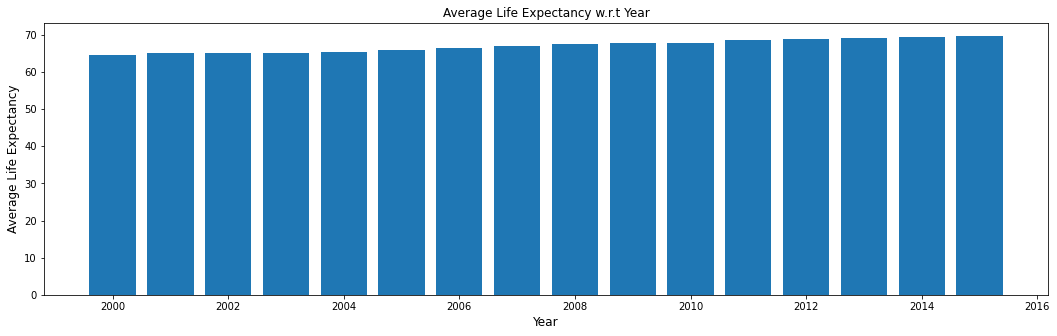

In [ ]:
# Life expectancy w.r.t Year using bar plot for developing countries
plt.figure(figsize = (18, 5))

plt.bar(developing_df.groupby('Year')['Year'].unique(), developing_df.groupby('Year')['Life expectancy'].mean())
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Average Life Expectancy", fontsize = 12)
plt.title("Average Life Expectancy w.r.t Year")
plt.show()

**Q:** Do you find any increase in the average life expectancy over 15 years?

**A:** Yes

**Q:** In which year, the average life expectancy was maximum?

**A:** 2015

---

#### 5. Developing versus Developed Countries

Find out whether the people living in developing countries die early as compared to those living in developed countries.

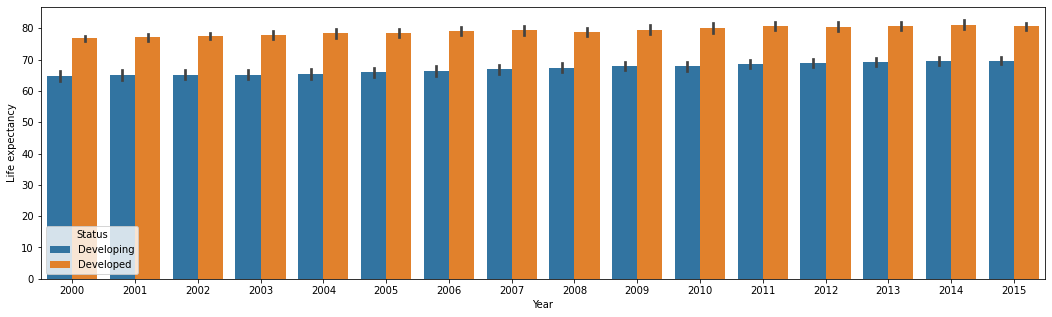

In [ ]:
# Create a bar plot for yearly life expectancy of developing and developed countries in a single bar chart.
plt.figure(figsize=(18, 5))
sns.barplot(x='Year', y='Life expectancy', hue='Status', data=df)
plt.show()

In [ ]:
# Find the overall average life expectancy of developed and developing countries
round(df[['Status','Life expectancy']].groupby(['Status']).mean())

,Life expectancy
Status,
Developed,79.0
Developing,67.0


**Q:** Is there a huge difference in the average life expectancies of developing and developed countries?

**A:** Yes

---

#### 6. Probability Distribution of Life Expectancy

Let us find out how many developing countries had extremely low life expectancy in the year 2015. Perform the following tasks:
- Create a line plot for the life expectancy of developing countries for the year 2015 with life expectancy on the X-axis and their corresponding probability densities on the Y-axis.

- Also, find out how many developing countries had extremely low life expectancy i.e. below 60 in the year 2015. Use $Z$-score and `cdf()` function to find the probability of the random variable $X \le 60$.

- List down the names of the developing countries that had a life expectancy below 60 years in the year 2015.


**Note:** Instead of applying the `cdf()` function, you can also use `integrate` module of the `scipy` package.


In [ ]:
# Create a Python function to calculate the individual probabilities of all the life expectancies
def prob_density_func(arr, mean, std):
  coeff = 1 / (std * np.sqrt(2 * np.pi))
  power_of_e = np.exp(-(arr - mean) ** 2 / (2 * std ** 2))
  prob = coeff * power_of_e
  return prob

In [ ]:
# Create a DataFrame of developing countries for year 2015
developing_df_2015=developing_df[developing_df['Year'] == 2015]
developing_df_2015

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,0,58.0,0,99.0,6.00,99.0,0.1,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,2.56,0.000000,63,59.5,24,95.0,5.40,95.0,0.1,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,2.56,0.000000,118,23.3,98,7.0,5.40,64.0,1.9,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,2.56,0.000000,0,47.7,0,86.0,5.40,99.0,0.2,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,2.56,0.000000,0,62.1,10,87.0,5.40,87.0,0.1,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,2.56,0.000000,256,17.5,35,97.0,5.40,97.0,0.1,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,2.56,0.000000,468,41.3,47,63.0,5.40,69.0,0.1,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,2.56,0.000000,9,23.4,40,9.0,5.40,9.0,4.1,6.3,6.1,0.576,12.5


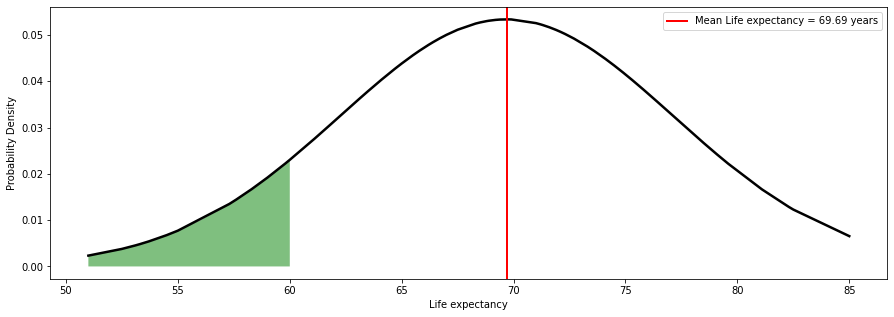

In [ ]:
# Plot the probability distribution of life expectancy of developing countries for the year 2015. Also, fill the area for X < 60.

array_2015 = np.sort(developing_df_2015['Life expectancy'])
probs_60 = prob_density_func(np.arange(array_2015.min(), 61), np.mean(array_2015), np.std(array_2015))

plt.figure(figsize=(15, 5))
#Plot the normal curve with life expectancies on X-axis and pdf on Y-axis
plt.plot(array_2015, prob_density_func(array_2015, np.mean(array_2015), np.std(array_2015)), color = 'black', linewidth = 2.5)
# Fill the area for X < 60
plt.fill_between(x = np.arange(array_2015.min(), 61), y1 = probs_60, facecolor = 'g', alpha = 0.5)
plt.axvline(np.mean(array_2015), color='red', label=f'Mean Life expectancy = {np.mean(array_2015):.2f} years', linewidth=2) 
plt.xlabel("Life expectancy")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [ ]:
# Calculate Z-score of 60 and find P(X < 60) by applying 'cdf()' function
from scipy.stats import norm
# Calculate the z-score for the 60
zscore_60 = (60 - np.mean(array_2015)) / np.std(array_2015)

prob_less_than_60 = norm.cdf(zscore_60)
print(f"{prob_less_than_60*100:.2f} % of developing countries have life expectancy below 60 years")

9.74 % of developing countries have life expectancy below 60 years




**Q:** How much percentage of developing countries had extremely low life expectancy in the year 2015?

**A:** Approximately 10%.



In [ ]:
# List down the name of the countries having life expectancy below 60 in the year 2015
df_countries = developing_df_2015.loc[developing_df_2015['Life expectancy'] < 60]
df_countries[['Country','Life expectancy']]

,Country,Life expectancy
48,Angola,52.4
400,Burkina Faso,59.9
416,Burundi,59.6
432,Côte d'Ivoire,53.3
480,Cameroon,57.3
512,Central African Republic,52.5
528,Chad,53.1
721,Democratic Republic of the Congo,59.8
834,Equatorial Guinea,58.2
1074,Guinea,59.0


**Q:** Which country had the lowest life expectancy in the year 2015?

**A:** Angola

---

#### 7. Finding Correlation 

Find the columns that are highly correlated with the `Life expectancy` column. For this, calculate the correlation coefficient values between all the columns and then use a heatmap to visualise these correlations.

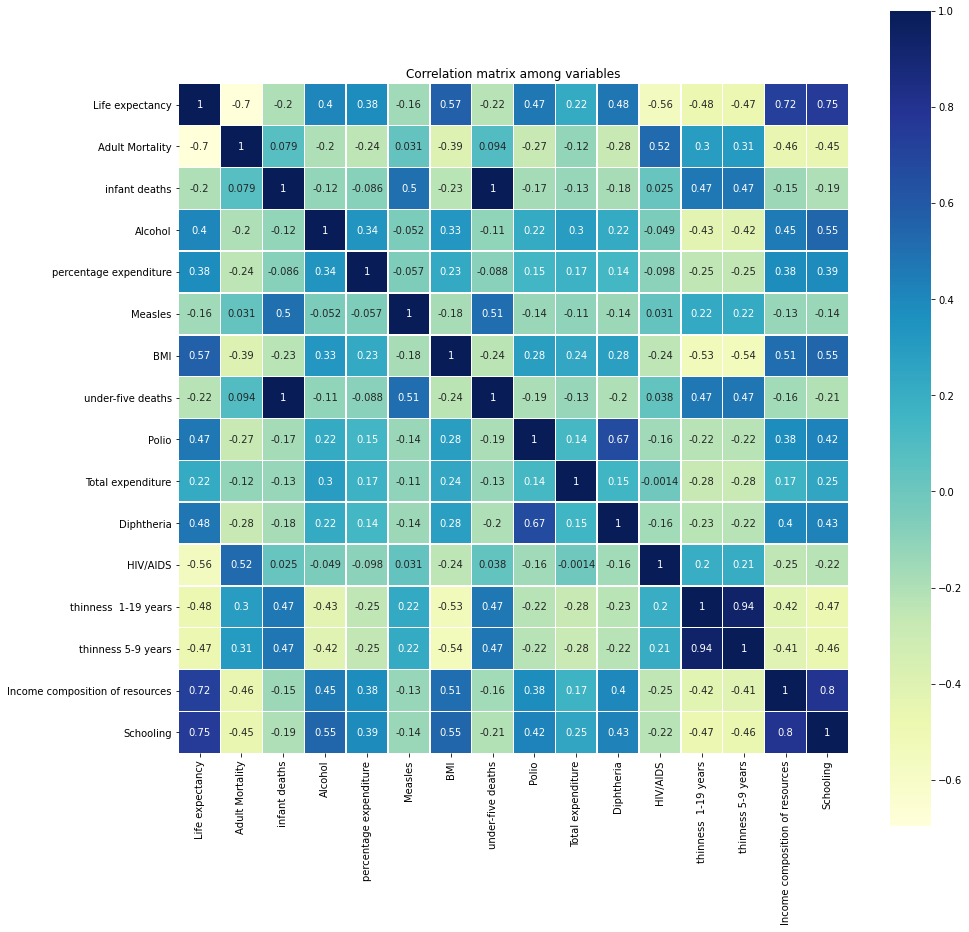

In [ ]:
# calculate correlation coefficient for all columns of the original DataFrame
corr_df = df.iloc[:,3:].corr()  # excluding first 3 columns
# Use heatmap to observe correlations.
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(corr_df, square=True, annot=True, linewidths=.5,cmap='YlGnBu')
plt.title("Correlation matrix among variables")
plt.show()

**Q:** Which attribute(s) have an extremely strong **positive** correlation with `Life expectancy`?

**A:** `Income composition of resources` and `Schooling`.

This means that the countries having lower life expectancy are not using their available resources productively and thus are not able to keep its people alive in the long-term.  Also, the `Schooling` had a positively strong correlation which suggests that the number of years people spend learning in school can increase their life expectancy.


**Q:** Which attribute(s) have an extremely strong **negative** correlation with `Life expectancy`?

**A:** `Adult Mortality` and `HIV/AIDS`.

This means that as the Adult mortality and HIV/AIDS death rates increase in a nation, it is likely to have a record of low life expectancy among its people.


*All the other attributes other than these four have a positive or negative moderate correlation which implies that they do not have that much impact on life expectancy.*


**Q:** By observing the correlation heatmap, find out other attributes or features that are highly correlated with each other (excluding Life expectancy).

**A:** Following are the observations:

- `thinness 1-19 years` and `thinness 1-19 years` are positively correlated.
- `Infant deaths` and `under five deaths` share a perfect positive correlation.
- `Polio` and `Diphtheria` are positively correlated.
- `Income composition of resources` and `Schooling` are positively correlated.



---